# 作業目標:
    了解 Padding 的作法
    
    了解 Pooling 的作法

# 作業重點:
    (1) 調整Padding 的設定, 看 Pad 後的結果
    
    (2) 調整Pooling 的設定, 看 Poolin 後的結果

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

# 繪圖結果直接顯示在Jupyter cell 之內
%matplotlib inline  
plt.rcParams['figure.figsize'] = (5.0, 4.0) #  設定繪圖板的大小
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# autoreload。可以讓我們不退出IPython就動態修改代碼，在執行代碼前IPython會幫我們自動重載改動的模塊
%load_ext autoreload
%autoreload 2
np.random.seed(1)

In [2]:
# GRADED FUNCTION: zero_pad
def zero_pad(X, pad):
    """
    對image X 做 zero-padding. 
    參數定義如下:
    X -- python numpy array, 呈現維度 (m, n_H, n_W, n_C), 代表一批 m 個圖像
         n_H: 圖高, n_W: 圖寬, n_C: color channels 數
    pad -- 整數, 加幾圈的 zero padding.
    Returns:
    X_pad -- image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C) 做完zero-padding 的結果
    """
    
    X_pad = np.pad(X, ((0, 0), (pad, pad), (pad, pad), (0, 0)), 'constant', constant_values=(0, 0))
  
    return X_pad

x.shape = (100, 64, 64, 3)
x_pad.shape = (100, 68, 68, 3)
x[1,1] = [[-0.51130169  1.47640754 -0.45251759]
 [-1.13232971 -0.21455681 -0.71995179]
 [-0.32530589  1.47348889  0.02667262]
 [-1.54647963  0.13797939 -1.91680807]
 [-0.70080347 -0.28978177  0.17862596]
 [ 1.99313304 -0.02448568 -0.98550207]
 [ 1.66698325  1.51513887 -1.84365055]
 [ 0.86563333  0.7698359   0.37021397]
 [ 1.21043837  1.56144949  0.62872036]
 [ 0.55245315  0.49913991 -0.24699558]
 [ 0.42175362  0.30402145 -0.76021803]
 [ 0.57909272  0.21850526 -0.85147246]
 [ 0.04740056  0.17689728  1.32662108]
 [ 0.61803778  0.23208729  0.14421974]
 [-0.23780076 -0.23587038 -0.76588597]
 [ 0.16849868  1.11018628  0.28228137]
 [ 0.15434071 -1.50664682 -1.28492184]
 [ 0.65145547  0.33585955 -0.87962585]
 [ 1.17185816  0.42917901  1.03261431]
 [-0.38934873  1.55774924  0.21971363]
 [ 0.37011163  1.16525635  0.42442499]
 [-0.47491633  0.90818595 -1.8237366 ]
 [-0.71894611  0.51647894  1.26819591]
 [ 1.48215432  0.21736201  0.3543711

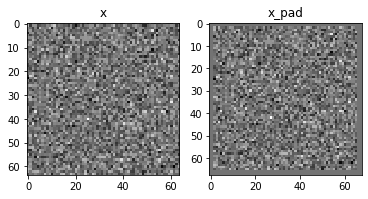

In [3]:

#作業修改
np.random.seed(1)

x = np.random.randn(100, 64, 64, 3)
x_pad = zero_pad(x, 2)


print ("x.shape =", x.shape)
print ("x_pad.shape =", x_pad.shape)
print ("x[1,1] =", x[1,1])
print ("x_pad[1,1] =", x_pad[1,1])
fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0,:,:,0])

In [4]:
# GRADED FUNCTION: pool_forward
def pool_forward(A_prev, hparameters, mode = "max"):
    """
    設計一個前行網路的池化層
    參數定義如下:
    A_prev -- 輸入的numpy 陣列, 維度 (m, n_H_prev, n_W_prev, n_C_prev)
    hparameter 超參數 --  "f" and "stride" 所形成的python 字典
    mode -- 池化的模式: "max" or "average"
    
    返回:
        A -- 輸出的池化層, 維度為 (m, n_H, n_W, n_C) 的 numpy 陣列
        cache -- 可以應用在 backward pass pooling layer 資料, 包含 input and hparameter
    """

    # 檢索尺寸 from the input shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
 
    # 檢索超參數 from "hparameters"
    f = hparameters["f"]
    stride = hparameters["stride"]

    # 定義輸出的dimensions
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev

    # 初始化輸出的 matrix A
    A = np.zeros((m, n_H, n_W, n_C))

    ### 程式起始位置  ###
    for i in range(m): # 訓練樣本的for 迴圈
        for h in range(n_H): # 輸出樣本的for 迴圈, 針對vertical axis
            for w in range(n_W): #  輸出樣本的for 迴圈, 針對 horizontal axis
                for c in range (n_C): #  輸出樣本的for 迴圈, 針對channels

                     # 找出特徵圖的寬度跟高度四個點
                    vert_start = h * stride
                    vert_end = h * stride+ f
                    horiz_start = w * stride
                    horiz_end = w * stride + f

                    # 定義第i個訓練示例
                    a_prev_slice = A_prev[i, vert_start:vert_end, horiz_start:horiz_end,c]

                    # 計算輸入data 的池化結果. 使用 if statment 去做分類
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_prev_slice)

                        ### 程式結束  ###
    
    # 儲存輸入的特徵圖跟所設定的超參數, 可以用在 pool_backward()
    cache = (A_prev, hparameters)
    
    # 確認輸出的資料維度
    assert(A.shape == (m, n_H, n_W, n_C))
    return A, cache

In [5]:

#作業修改
np.random.seed(1)
A_prev = np.random.randn(10, 8, 8, 3)
hparameters = {"stride" : 2, "f": 5}


A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A =", A)
print()
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A =", A)

mode = max
A = [[[[1.74481176 1.46210794 1.65980218]
   [1.74481176 1.6924546  2.18557541]]

  [[2.18697965 1.25286816 1.27375593]
   [2.18697965 1.51981682 2.18557541]]]


 [[[2.44936865 1.93752881 1.95487808]
   [2.44936865 2.05117344 1.9560789 ]]

  [[2.06578332 1.93752881 3.03085711]
   [2.06578332 2.05117344 1.81053491]]]


 [[[2.05635552 1.78975468 1.7653351 ]
   [2.11060505 2.0546241  1.86647138]]

  [[1.69380911 1.78975468 1.7653351 ]
   [1.69380911 1.78975468 1.86647138]]]


 [[[1.91979229 1.74643509 2.50598029]
   [1.91979229 1.74643509 2.50598029]]

  [[3.32107876 1.57546791 2.50598029]
   [3.32107876 1.49810818 2.50598029]]]


 [[[1.49588477 1.10861676 2.29371761]
   [2.42887697 1.2179409  1.65712464]]

  [[1.49588477 1.37975819 2.29371761]
   [2.42887697 1.37975819 1.80358898]]]


 [[[1.5666862  2.56545278 1.45652739]
   [1.5666862  2.02999749 2.36973019]]

  [[1.5666862  2.56545278 1.32269399]
   [1.79791937 2.02999749 2.36973019]]]


 [[[2.23027415 1.7626089  2.91730876]